In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',30)


In [3]:
df = pd.read_csv('kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
## always remember : since id does not contribute anything to the data so we drop it

In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.columns = ['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','puss_cell','puss_cell_clumps','bacteria','blood_glucose_random',
              'blood_urea','serum_ceratinine','sodium','pottasium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetes_mellitus',
              'coronary_artery_disease','apetite','peda_edema','aanemia','class']

In [10]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,puss_cell,puss_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_ceratinine,sodium,pottasium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,apetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.info()  ## checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   puss_cell                335 non-null    object 
 7   puss_cell_clumps         396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_ceratinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  pottasium                312 non-null    float64
 14  haemoglobin              3

In [12]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [13]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors='coerce')

In [14]:
df['packed_cell_volume'].dtype

dtype('float64')

In [15]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [16]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors='coerce')

In [17]:
df['red_blood_cell_count'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [18]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors='coerce')

In [19]:
df['red_blood_cell_count'].dtype

dtype('float64')

In [20]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [21]:
df['coronary_artery_disease'] = df['coronary_artery_disease'].str.replace('\tno','no')

In [22]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [23]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].str.replace('\tno','no').str.replace('\tyes','yes')

In [24]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', ' yes', nan], dtype=object)

In [25]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].str.replace(' yes','yes')

In [26]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [27]:
df['hypertension'].unique()

array(['yes', 'no', nan], dtype=object)

In [28]:
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [29]:
df['class'] = df['class'].str.replace('ckd\t','ckd')

In [30]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [31]:
df['class'] = df['class'].map({
    'ckd':0,
    'notckd':1
})

In [32]:
cat_col = [col for col in df.columns if df[col].dtype=='O']
num_col = [col for col in df.columns if df[col].dtype!='O']

In [33]:
cat_col

['red_blood_cells',
 'puss_cell',
 'puss_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'apetite',
 'peda_edema',
 'aanemia']

In [34]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_ceratinine',
 'sodium',
 'pottasium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'class']

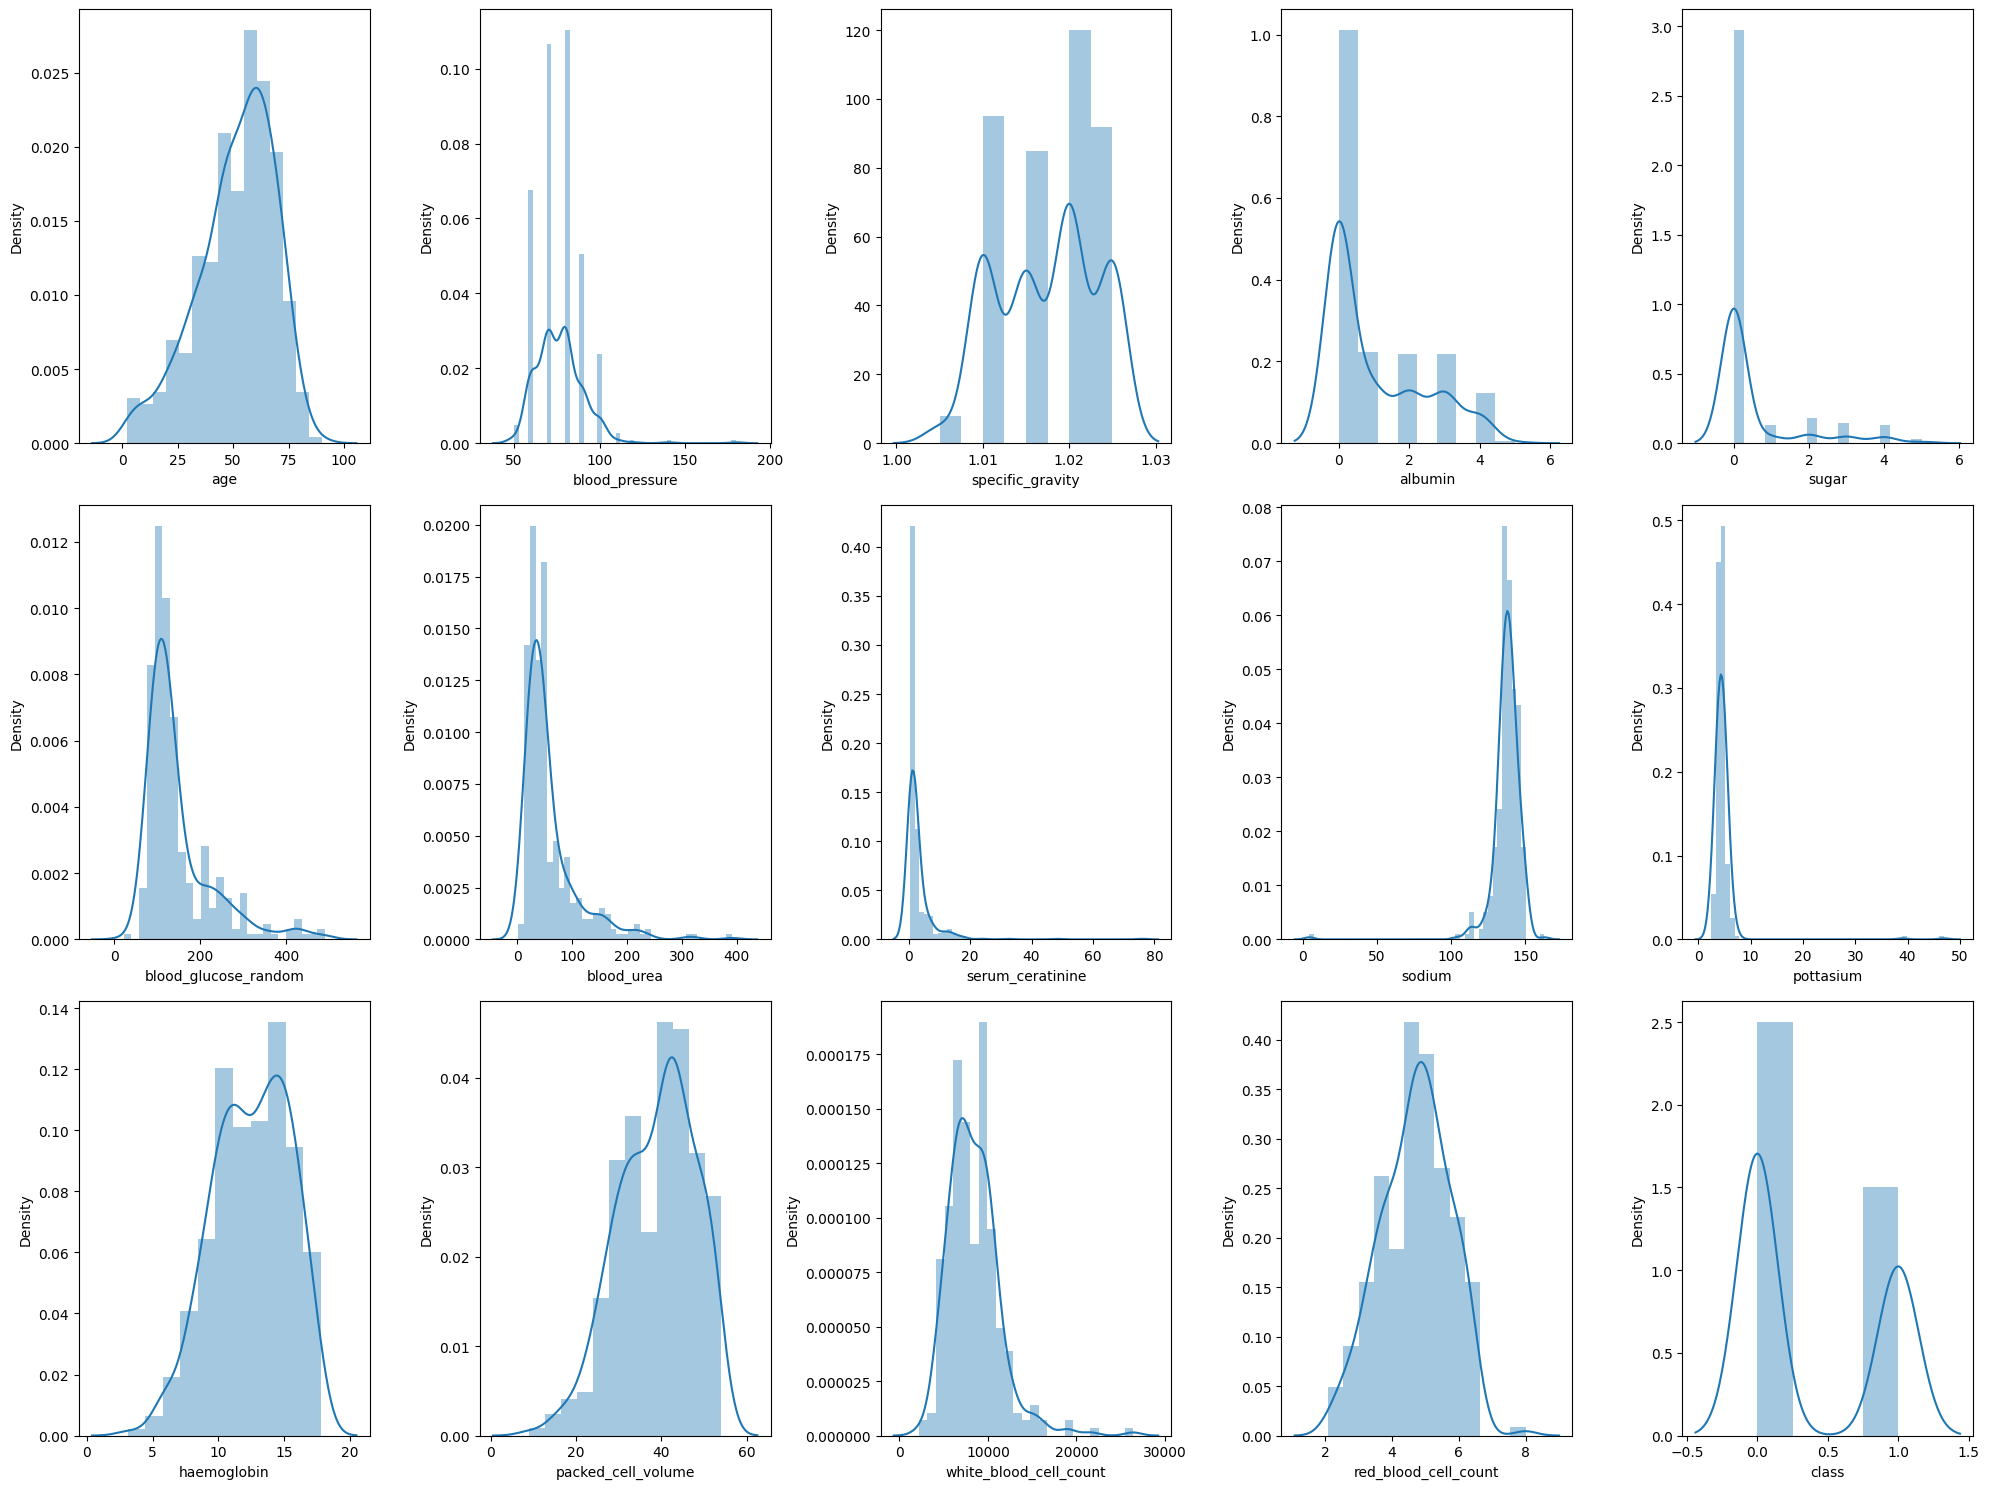

In [35]:
plt.figure(figsize=(20,15))
plotnumber = 1

for col in num_col:
    if plotnumber<=len(num_col):
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
    
plt.tight_layout()
plt.show()


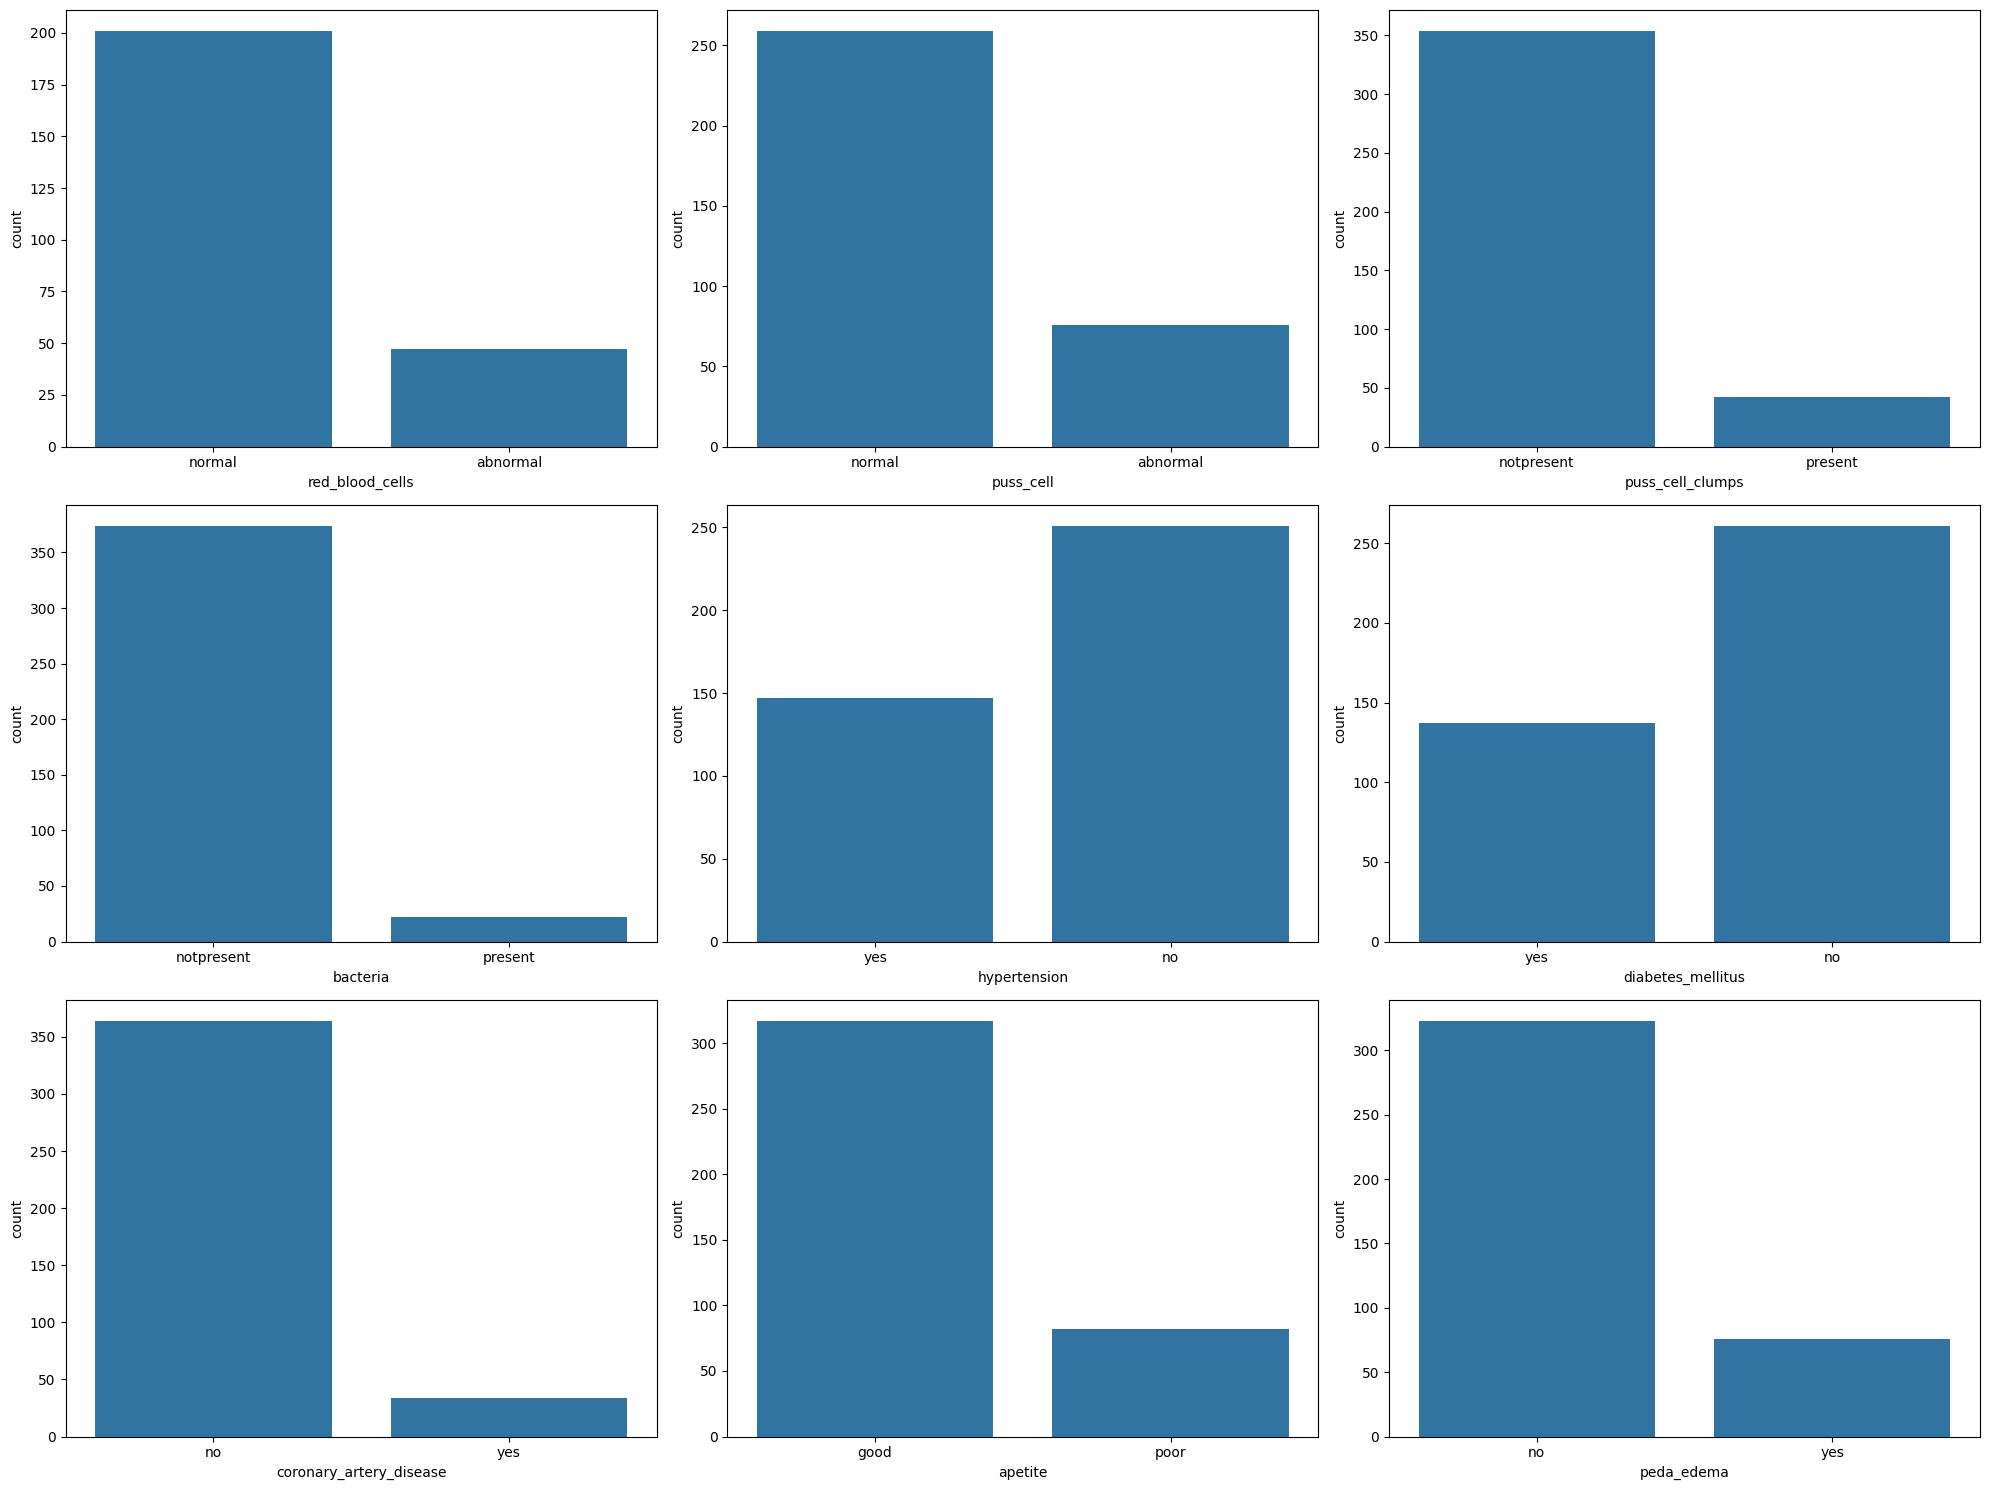

In [36]:
plt.figure(figsize=(20,15))
plotnumber = 1
for col in cat_col:
    if plotnumber<len(cat_col):
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [97]:
# analyzing the distribution having abnormal red_blood_cells and chroninc disease also 

In [37]:
df_ckd = df[df['class']==0]
df_not_ckd = df[df['class']==1]

In [38]:
df_ckd.shape,df_not_ckd.shape

((250, 25), (150, 25))

<Axes: xlabel='red_blood_cells', ylabel='count'>

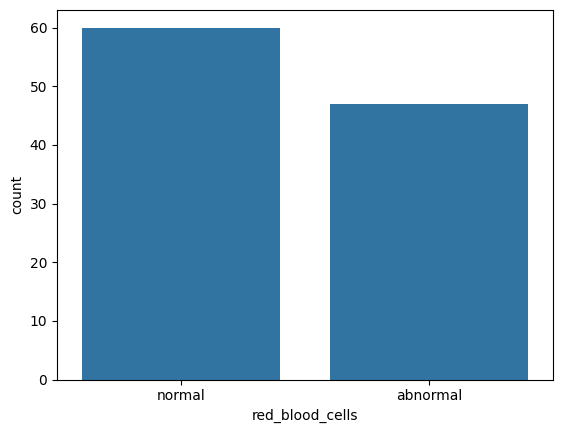

In [39]:
sns.countplot(x = df_ckd['red_blood_cells'])  # insights person having normal red_blood_cells are more likely to have ckd

<Axes: xlabel='red_blood_cells', ylabel='count'>

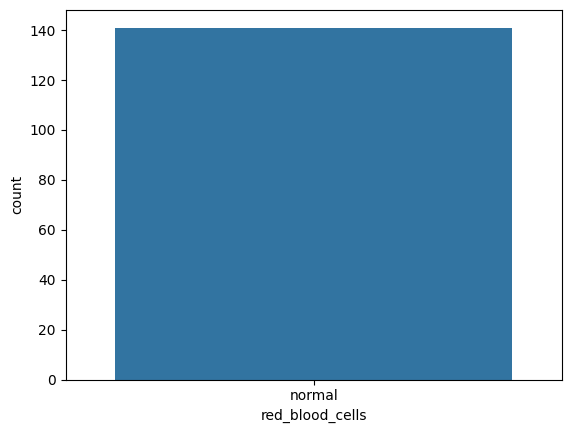

In [40]:
sns.countplot(x = df_not_ckd['red_blood_cells']) 

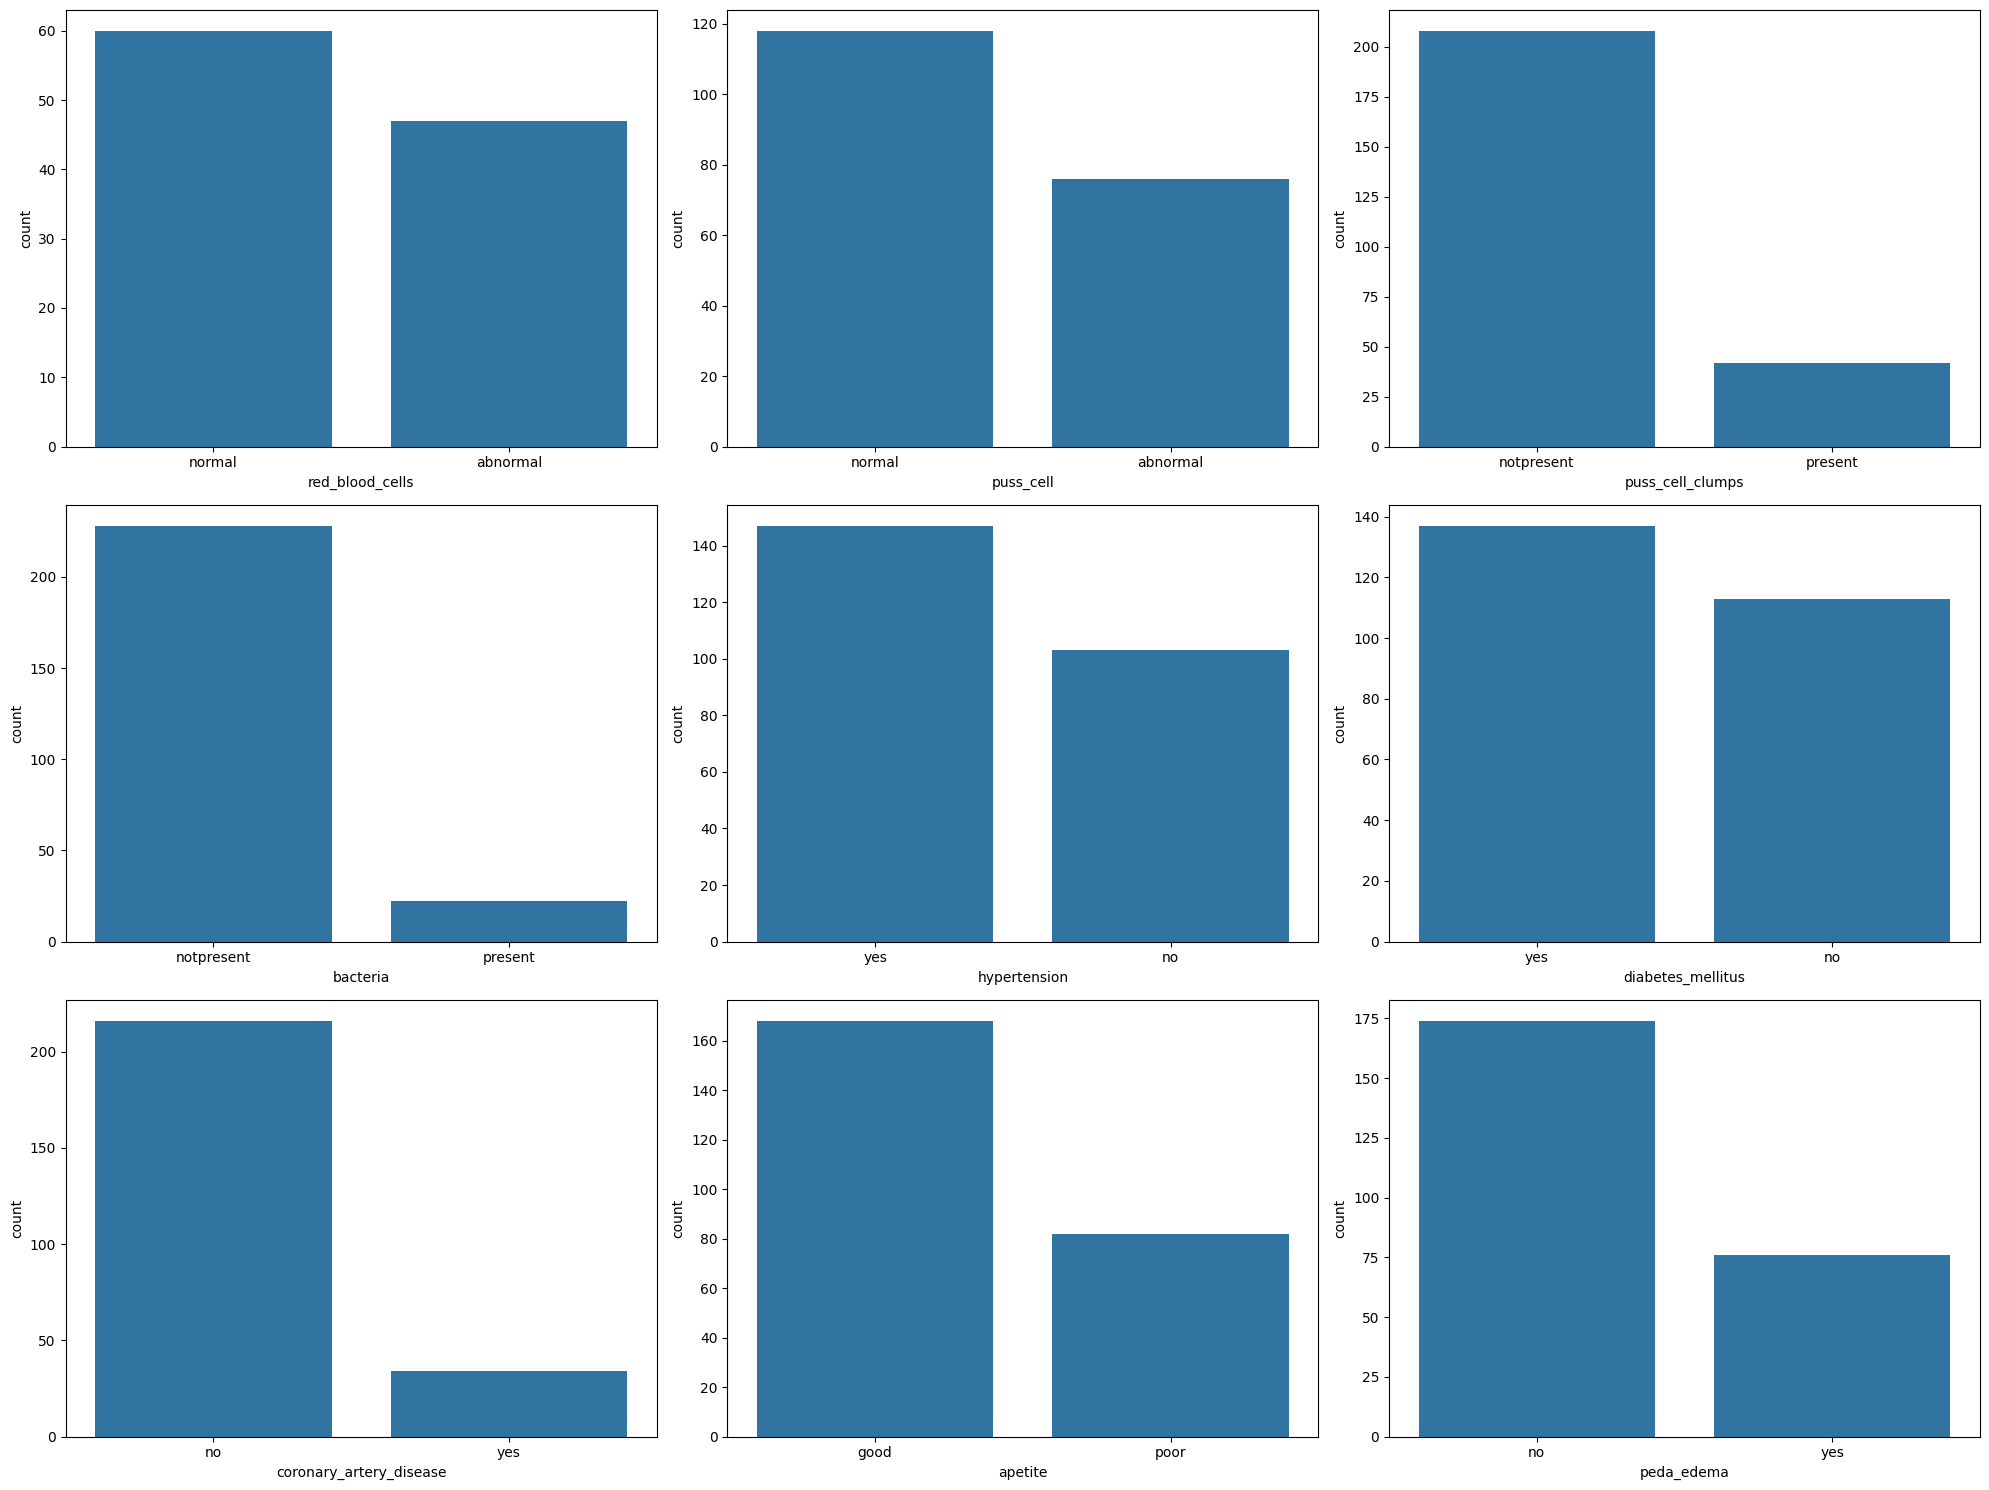

In [41]:
plt.figure(figsize=(20,15))
plotnumber = 1
for col in cat_col:
    if plotnumber<len(cat_col):
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=df_ckd[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [110]:
# from this we can say :
# as per datasets :
# normal red_blood_cells persons are more in chronic disease
# normal pus_cell patients are more in chronic disease
# persons having no pus_cells_clumps are more in chronic disease
# persons having no bacteria are more in chronic disease
# persons having hypertension are more in chronic disease
# persons having diabetes_mellitus are more in chronic disease
# persons having no conronary_artery_disease are more in chronic disease
# persons having good apettite are more in chronic disease
# persons having no peda_edema are more in chronic disease

<Axes: ylabel='count'>

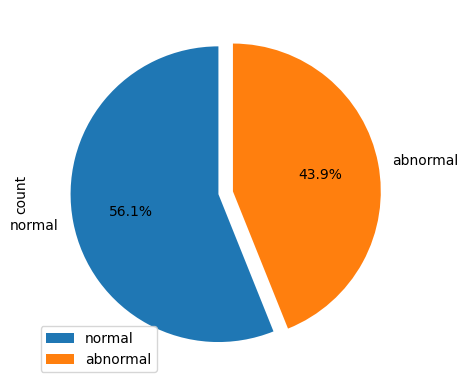

In [42]:
df_ckd['red_blood_cells'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0,0.1),startangle=90,legend=True)

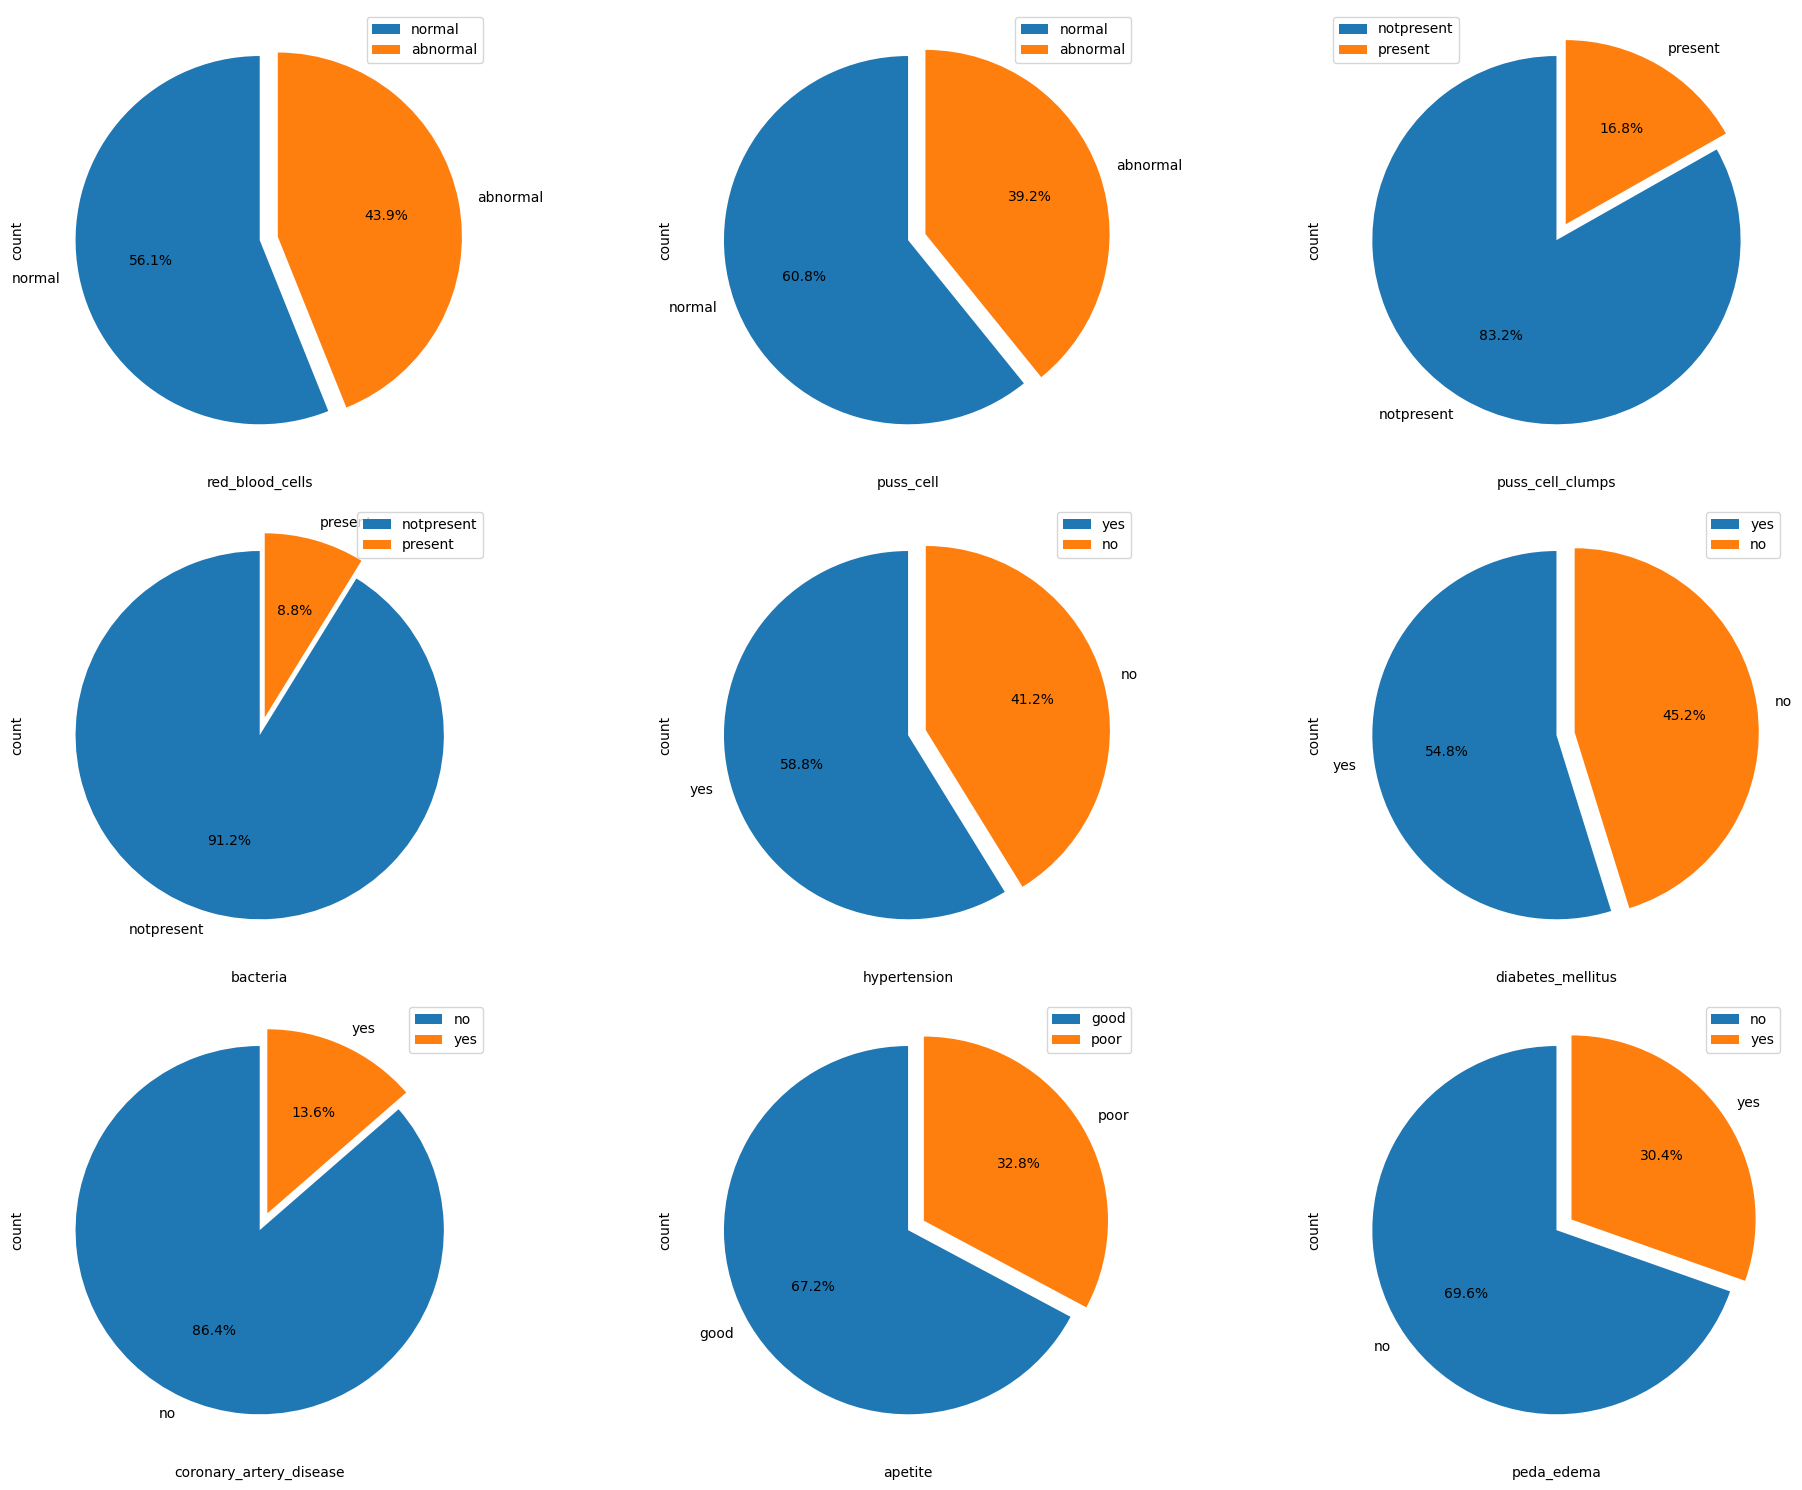

In [43]:
# Distribution of chronic disease person among cat_Col
plt.figure(figsize=(20,15))
plotnumber = 1
for col in cat_col:
    if plotnumber<len(cat_col):
        ax = plt.subplot(3,3,plotnumber)
        df_ckd[col].value_counts().plot.pie(autopct='%1.1f%%',explode=(0,0.1),startangle=90,legend=True)
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [127]:
# insights :
# in our datasets :
# red_blood_cells : 56.1% persons have normal red_blood_cells yet they have chronic disease
#                   43.9% persons have abnormal red_blood_cells and they have chronic disease

# pus_cell : 

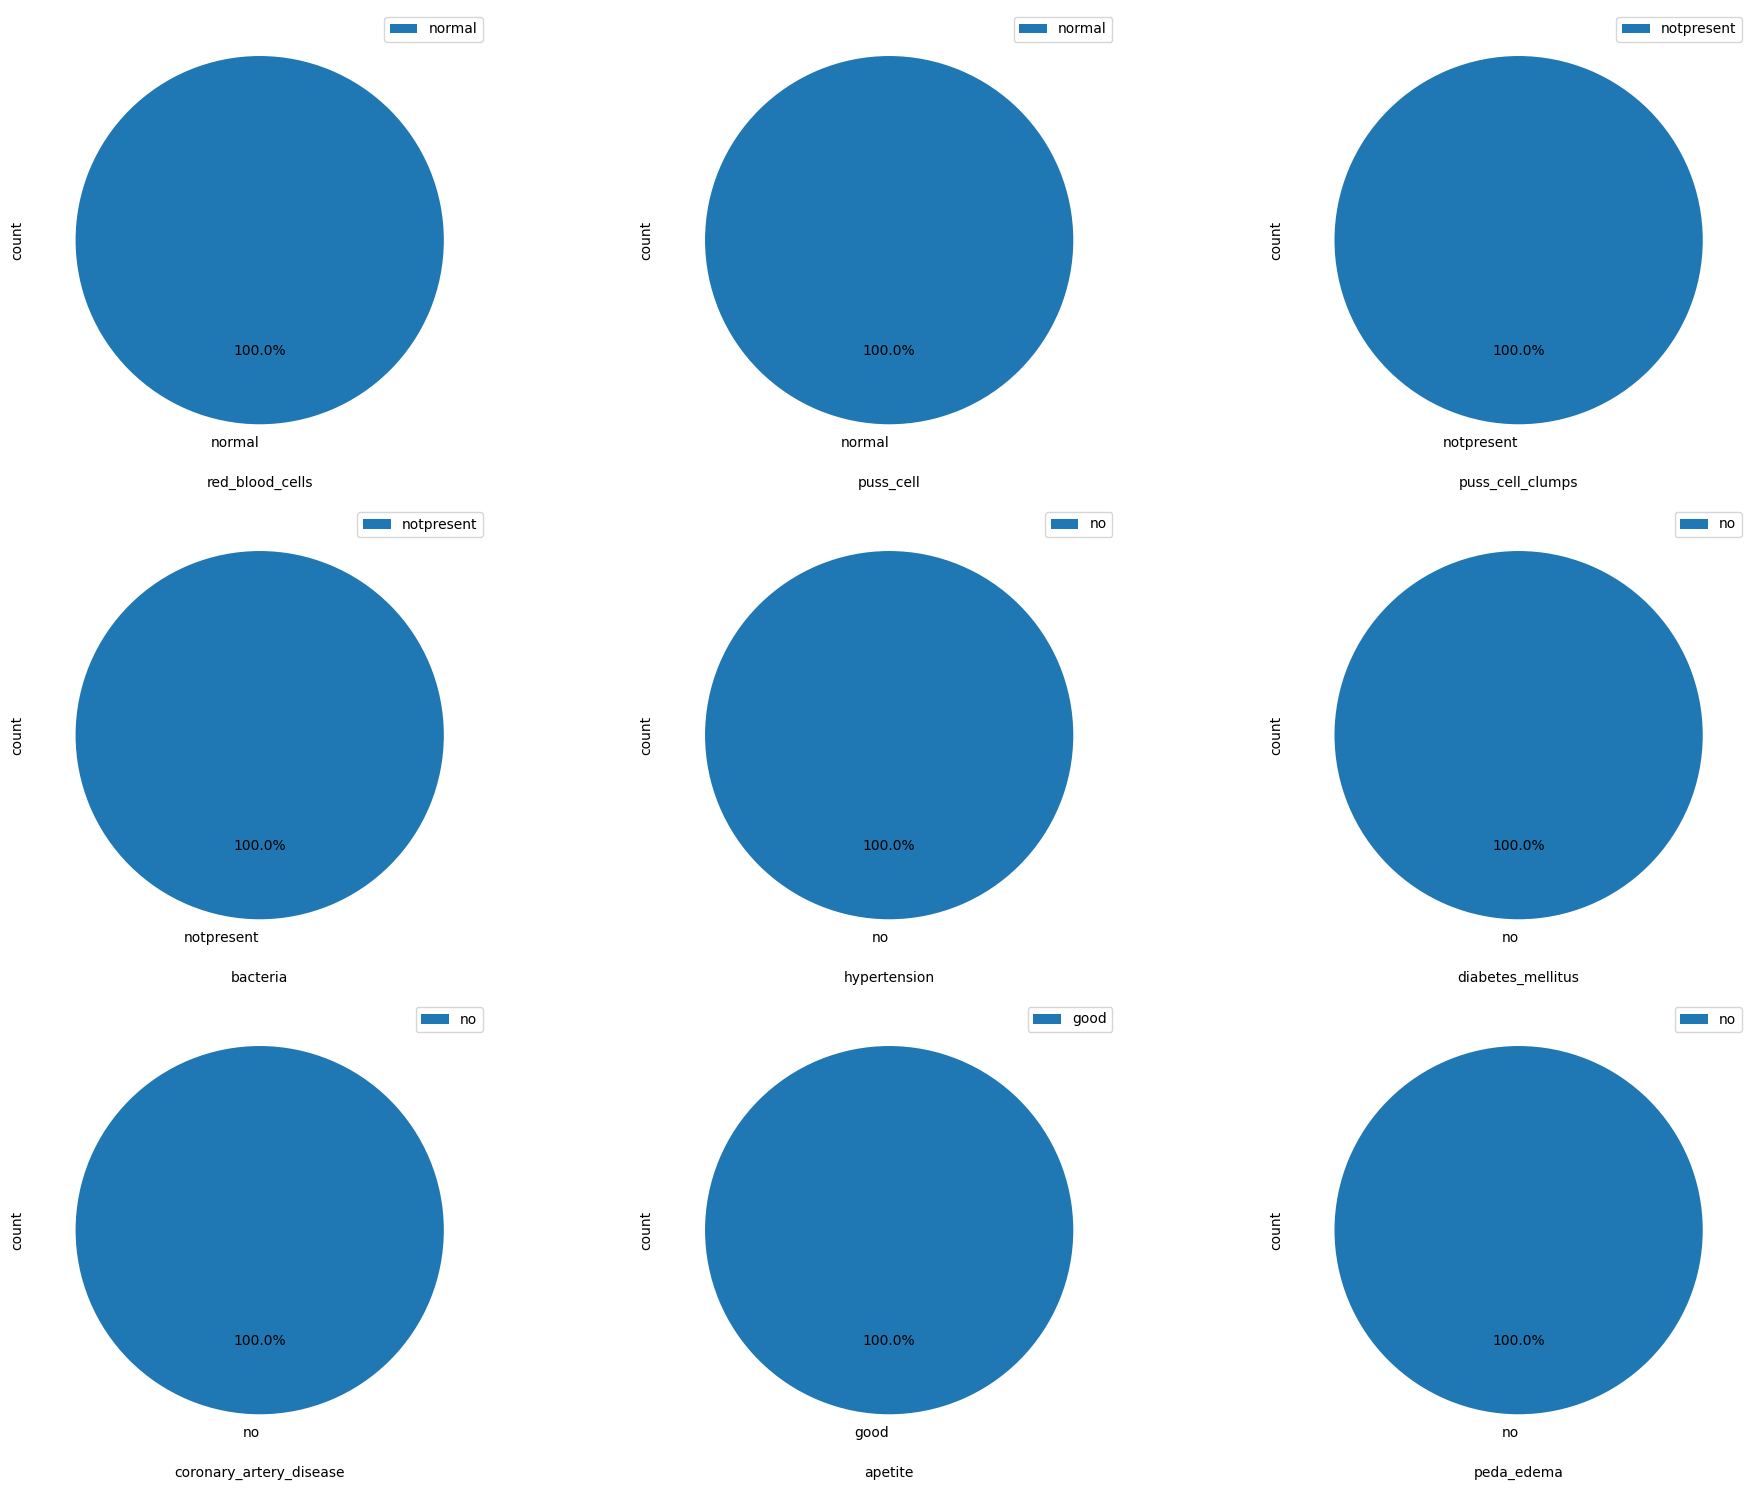

In [44]:
# Distribution of not_ckd persons among cat_col
plt.figure(figsize=(20,15))
plotnumber = 1

for col in cat_col:
    if plotnumber<len(cat_col):
        ax = plt.subplot(3,3,plotnumber)
        df_not_ckd[col].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,legend=True)
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [45]:
## Multivariate analysis 

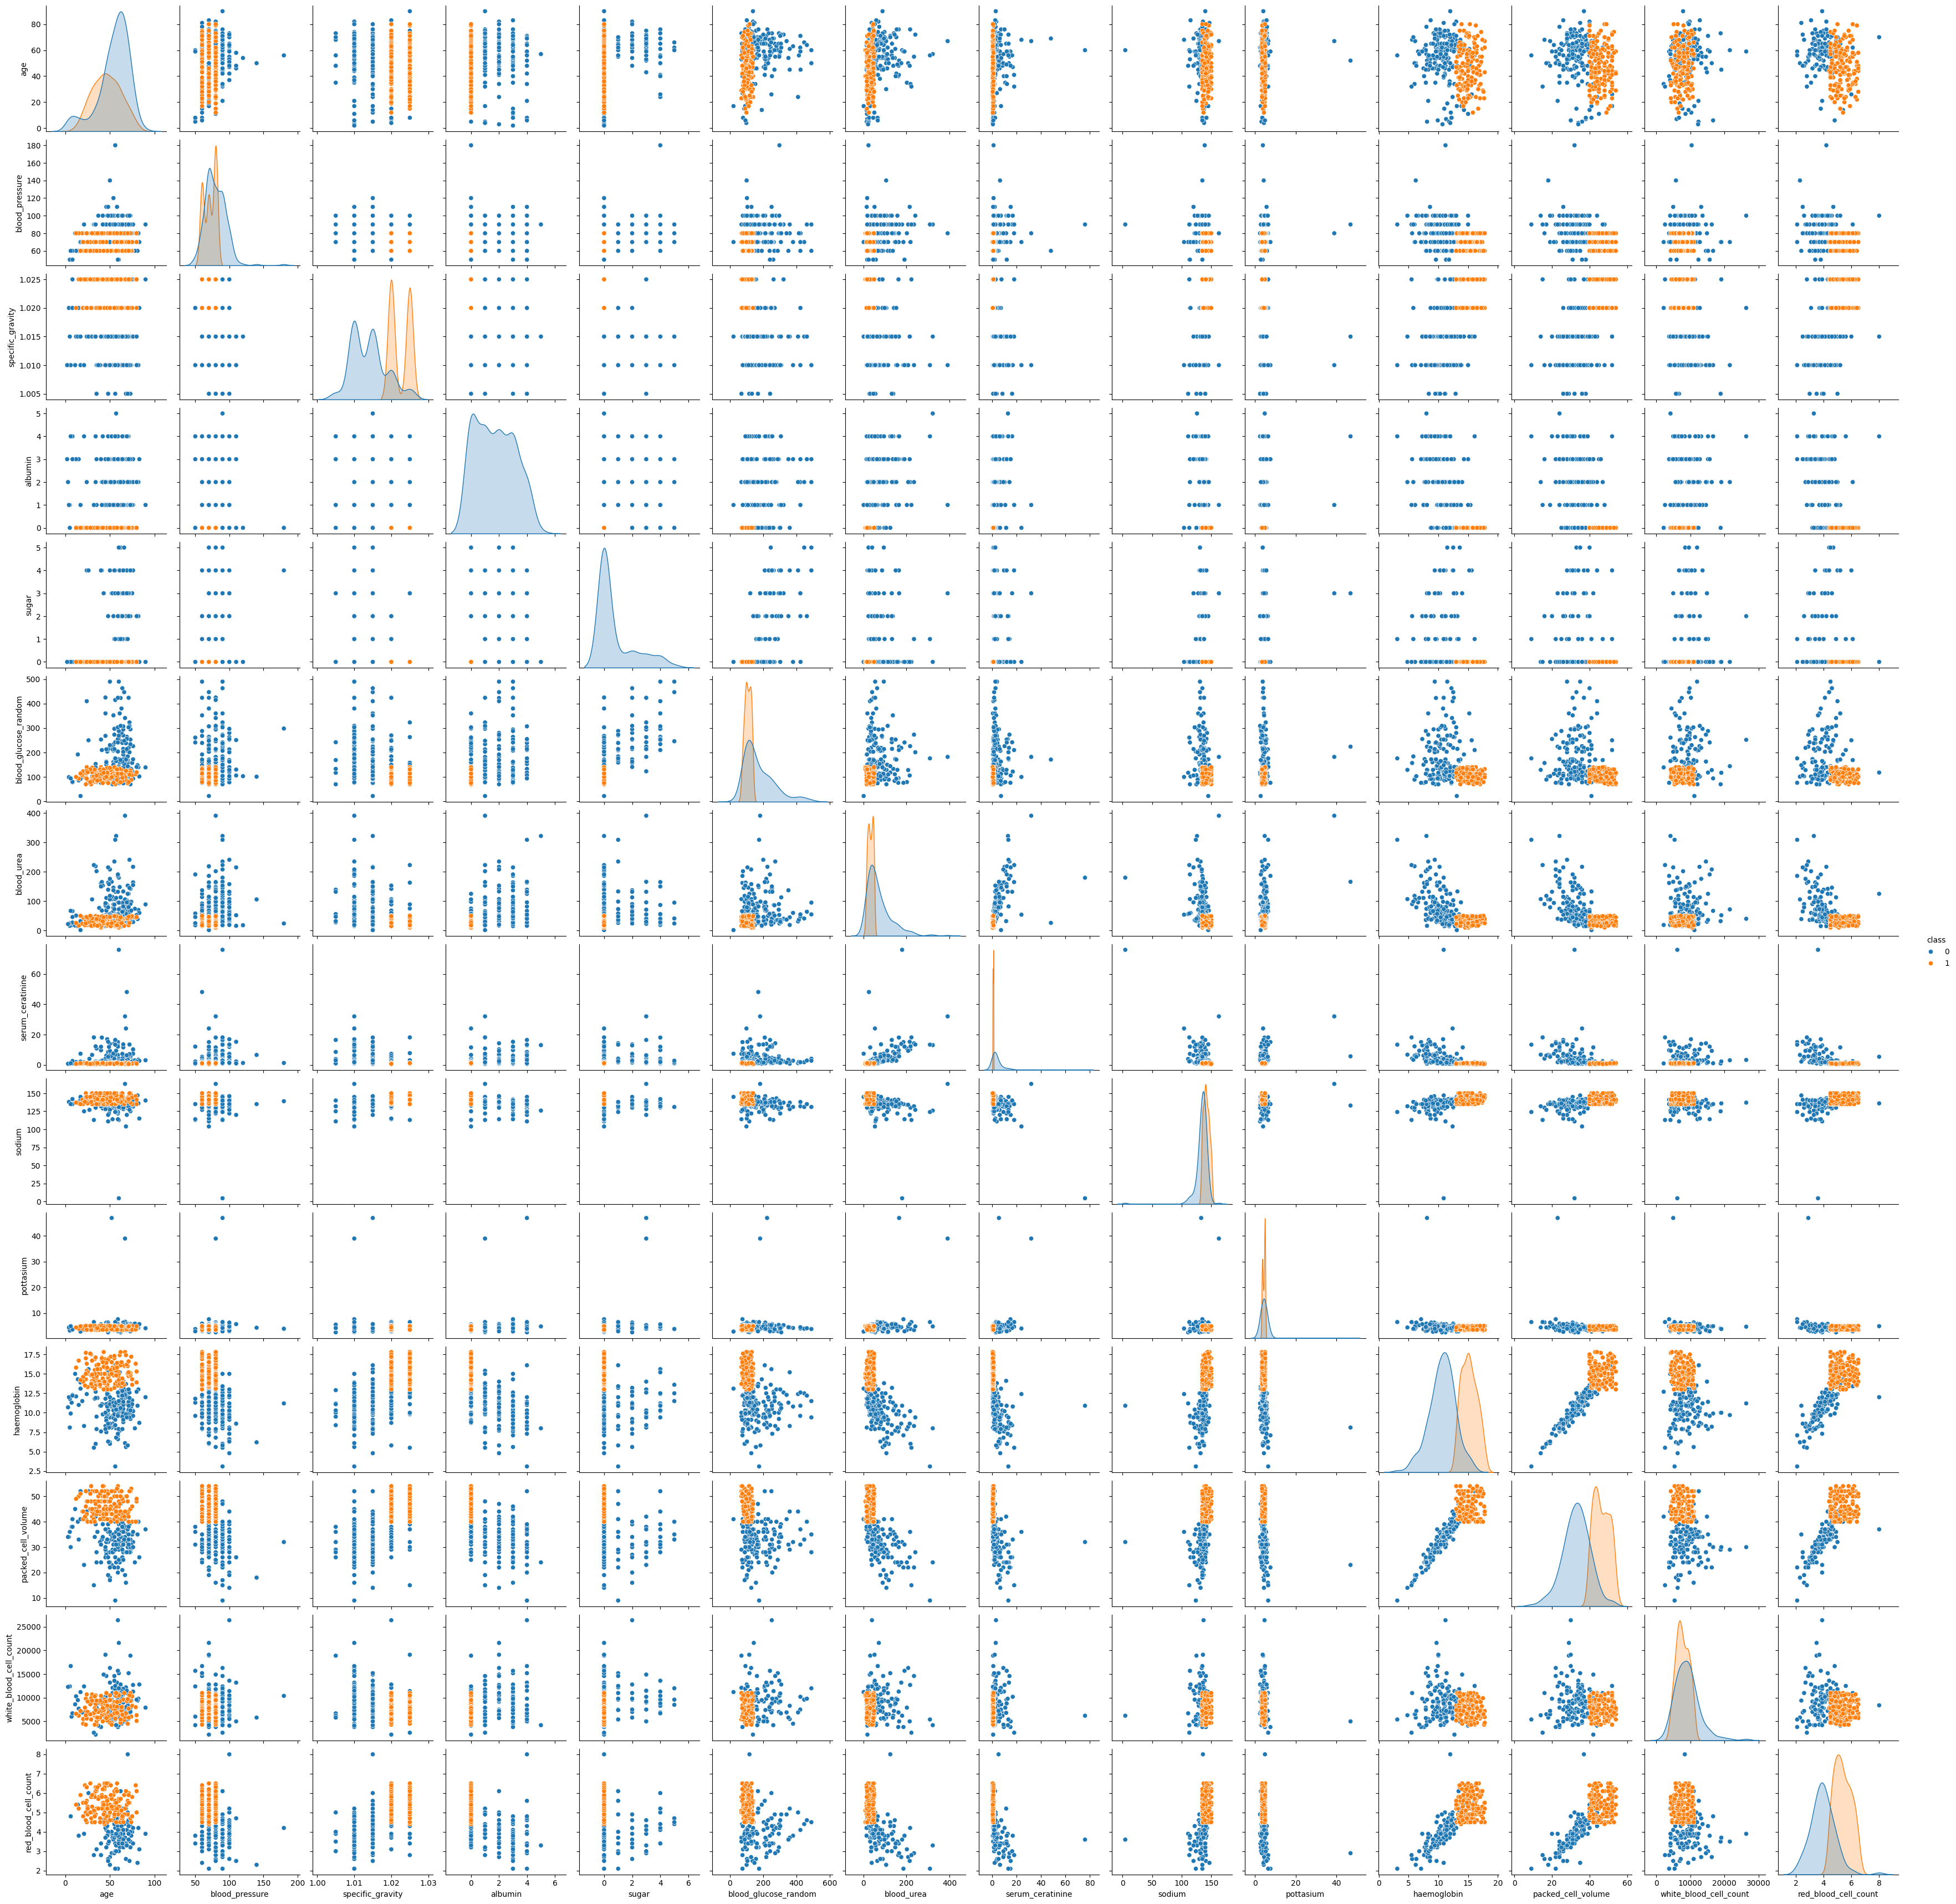

In [46]:
sns.pairplot(df,hue='class')

In [47]:
cat_col

['red_blood_cells',
 'puss_cell',
 'puss_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'apetite',
 'peda_edema',
 'aanemia']

<Axes: xlabel='age', ylabel='hypertension'>

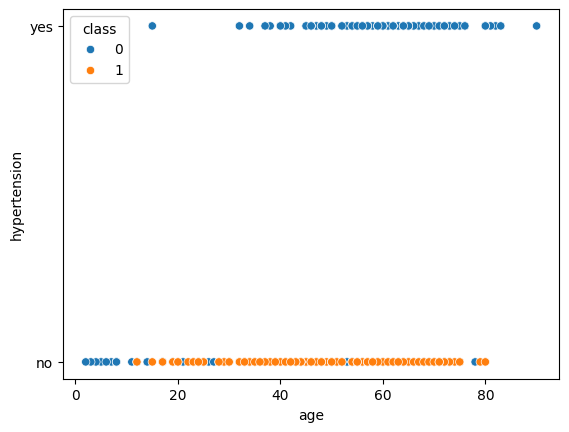

In [56]:
sns.scatterplot(x='age',y='hypertension',data=df,hue='class')

In [57]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'puss_cell', 'puss_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_ceratinine', 'sodium',
       'pottasium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'apetite', 'peda_edema',
       'aanemia', 'class'],
      dtype='object')